<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/chiel/optimal_cluster_count%2Bpartitioningmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install kneed
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=94418a8bfef590eb54db4bf20b259f11870eb36d369fada28cc6a79c8a9a05a3
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [5]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster



In [6]:
df = pd.read_csv('data_clean.csv')

In [7]:
pd.set_option("display.max_columns", None)

df = df.drop(columns=['Unnamed: 0'])
df.head()

,customer_region_0,customer_region_1,customer_region_2,customer_region_3,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,RFM_Score
0,0.0,1.0,0.0,0.0,0.142857,0.307692,0.166667,0.333333,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.093442,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.125,0.306394,0.578417,1.0,0.717691,1.000000,0.011111,0.0,0.2,0.465132,0.0,0.0,0.000000,0.00000,0.040816,0.0,0.55
1,0.0,0.0,0.0,1.0,0.142857,0.076923,0.333333,0.666667,1.0,0.045751,0.007126,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.125,0.202472,0.379445,0.0,0.717691,1.000000,0.011111,0.0,0.0,0.452267,0.0,0.0,0.034483,0.00000,0.000000,0.0,0.45
2,0.0,0.0,1.0,0.0,0.000000,0.076923,0.333333,0.666667,0.0,0.032833,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.05,0.125,0.094895,0.173895,0.0,0.717691,1.000000,0.011111,0.6,0.6,0.438951,0.0,0.0,0.034483,0.00000,0.000000,0.0,0.35
3,0.0,0.0,1.0,0.0,0.142857,0.153846,0.166667,0.333333,1.0,0.000000,0.015278,0.0,0.0,0.0,0.0,0.0,0.0,0.057786,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.058824,0.0,0.0,0.0,0.0,0.05,0.125,0.335196,0.633505,0.4,0.473024,0.988889,0.022222,0.0,0.4,0.311692,0.0,0.0,0.017241,0.02381,0.000000,0.0,0.55
4,0.0,0.0,1.0,0.0,0.142857,0.307692,0.000000,0.000000,1.0,0.051997,0.045578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.058824,0.0,0.0,0.0,0.0,0.05,0.125,0.591832,1.000000,1.0,0.473024,0.988889,0.022222,0.0,0.2,0.343460,0.0,0.0,0.034483,0.00000,0.000000,0.0,0.65


In [8]:
import numpy as np
import pandas as pd

def apply_pca(df, variance_threshold=0.8):
    """Apply PCA to retain specified variance threshold"""
    pca = PCA()
    pca_data = pca.fit_transform(df)

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    pca = PCA(n_components=n_components)
    return pca.fit_transform(df)


In [ ]:
df.columns


Index(['Unnamed: 0', 'customer_region_0', 'customer_region_1',
       'customer_region_2', 'customer_region_3', 'vendor_count',
       'product_count', 'is_chain', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
       'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'Total_Orders_Per_Client',
       'mnt', 'mnt_Per_Order', 'Items_Per_Order', 'frq', 'rcn', 'activity',
       'Loyalty', 'Age_Group', 'CLV_Score', 'Orders_Night', 'Orders_Dawn',
       'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
       'RFM_Score'],
      dtype='object')

In [ ]:
value_engagement_metrics = [
    # Value
    'mnt', 'mnt_Per_Order', 'CLV_Score', 'RFM_Score',
    # Engagement
    'activity', 'Loyalty', 'frq', 'rcn' ]

preference_metrics = [
    # Cuisine preferences
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

shopping_behavior_metrics = [
    # Shopping patterns
    'vendor_count', 'product_count', 'is_chain', 'last_promo',
    'payment_method', 'Items_Per_Order',
    # Timing preferences
    'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
    'Orders_Evening', 'Orders_Dusk',
    'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
]

demographic_metrics = [
    'customer_region_0', 'customer_region_1', 'customer_region_2',
    'customer_region_3', 'Age_Group'
]



In [ ]:
# value_engagement_metrics
# preference_metrics
# shopping_behavior_metrics
# demographic_metrics

df_val = df[value_engagement_metrics].copy()
df_pref = df[preference_metrics].copy()
df_shop = df[shopping_behavior_metrics].copy()
df_dem = df[demographic_metrics].copy()

In [ ]:
def analyze_clusters(df, max_clusters=10):
    """Analyze optimal number of clusters using PCA-transformed data"""
    # Apply PCA
    pca_data = apply_pca(df)

    # R-squared analysis
    r_squared = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(pca_data)
        r_squared.append(1 - kmeans.inertia_ / np.sum((pca_data - pca_data.mean(axis=0))**2))

    # Elbow method
    inertias = []
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(pca_data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # R-squared plot
    axes[0,0].plot(range(1, max_clusters + 1), r_squared, 'bo-')
    axes[0,0].set_title('R-squared Analysis')
    axes[0,0].set_xlabel('Number of Clusters')
    axes[0,0].set_ylabel('R-squared')

    # Elbow plot
    axes[0,1].plot(range(2, max_clusters + 1), inertias, 'ro-')
    axes[0,1].set_title('Elbow Method')
    axes[0,1].set_xlabel('Number of Clusters')
    axes[0,1].set_ylabel('Inertia')

    # Silhouette plot
    axes[1,0].plot(range(2, max_clusters + 1), silhouette_scores, 'go-')
    axes[1,0].set_title('Silhouette Analysis')
    axes[1,0].set_xlabel('Number of Clusters')
    axes[1,0].set_ylabel('Silhouette Score')

    # Dendrogram
    linkage_matrix = linkage(pca_data, method='ward')
    dendrogram(linkage_matrix, ax=axes[1,1])
    axes[1,1].set_title('Hierarchical Clustering Dendrogram')

    plt.tight_layout()
    return plt.gcf()

def print_analysis_summary(df, optimal_k):
    """Print summary statistics for the chosen number of clusters"""
    pca_data = apply_pca(df)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(pca_data)

    print(f"Analysis Summary for {optimal_k} clusters:")
    print(f"Silhouette Score: {silhouette_score(pca_data, labels):.3f}")
    print(f"Inertia: {kmeans.inertia_:.3f}")

    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nCluster Sizes:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} samples")

Analysis Summary for 4 clusters:
Silhouette Score: 0.312
Inertia: 27243.414

Cluster Sizes:
Cluster 0: 6004 samples
Cluster 1: 9557 samples
Cluster 2: 8456 samples
Cluster 3: 7720 samples


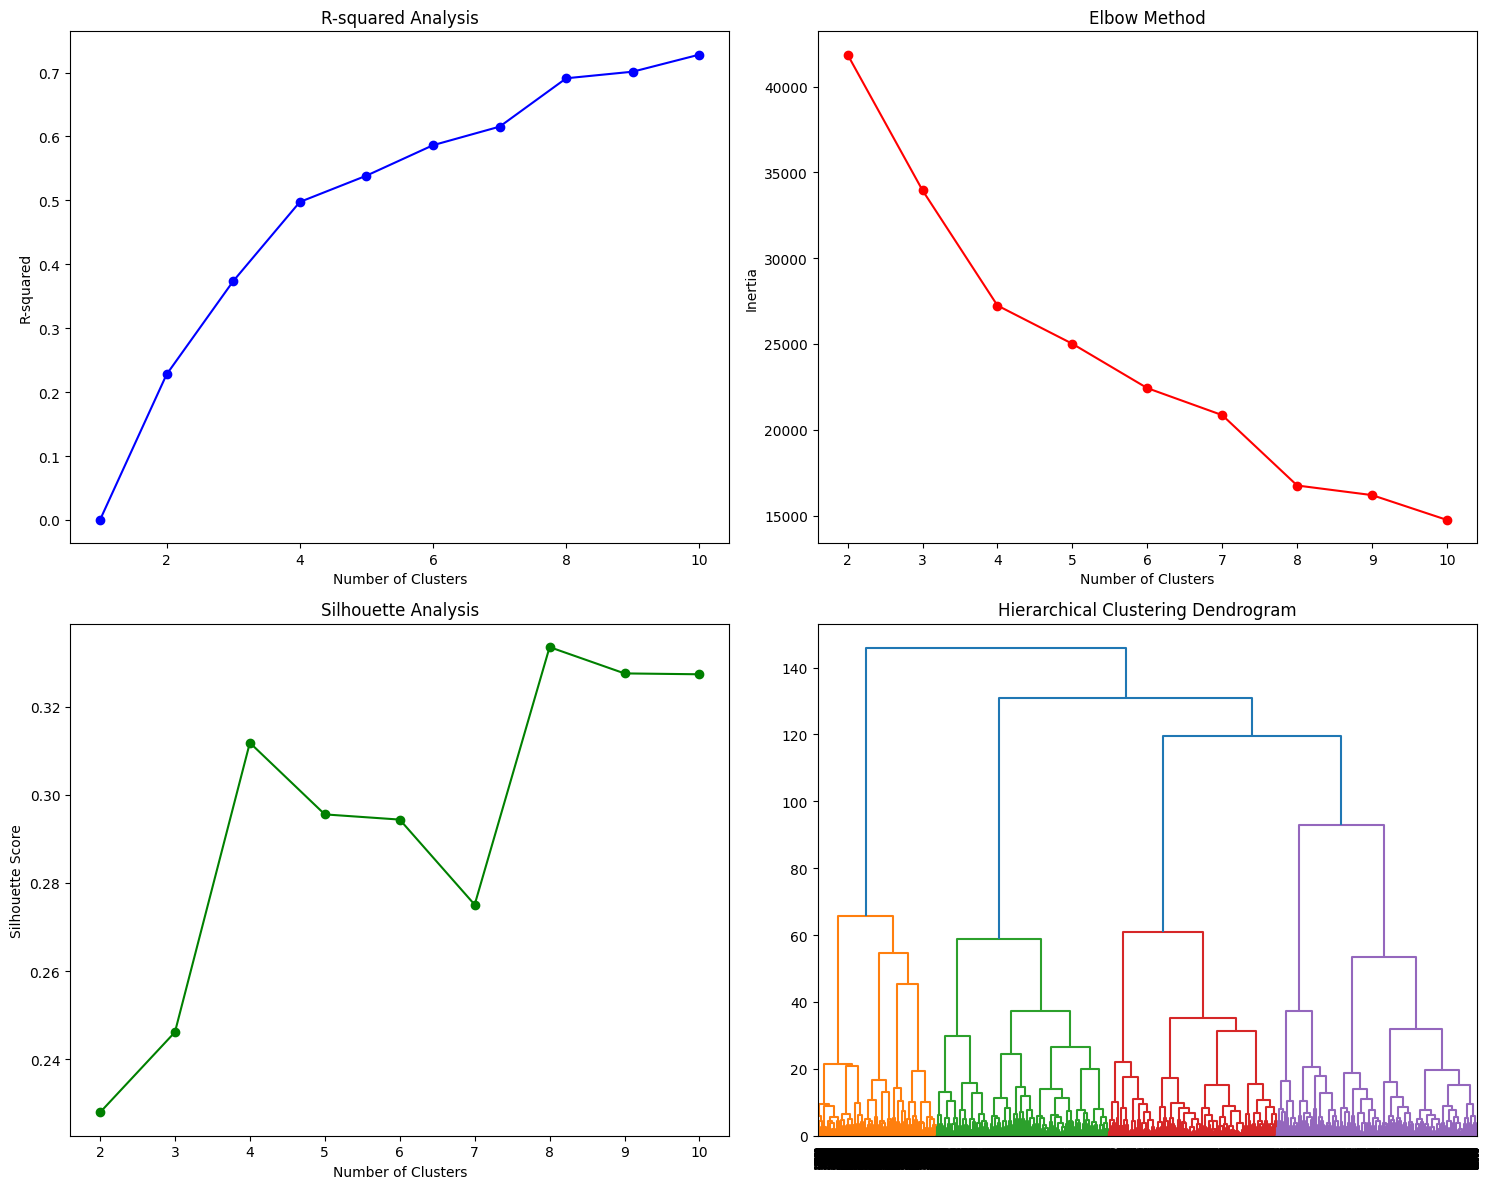

In [ ]:
df = pd.DataFrame(df)
fig = analyze_clusters(df)
print_analysis_summary(df, optimal_k=4)

In [ ]:
def evaluate_clustering(data, labels, name):
    """Calculate clustering metrics"""
    if len(np.unique(labels[labels >= 0])) <= 1:
        return None

    metrics = {
        'Silhouette': silhouette_score(data, labels),
        'Calinski-Harabasz': calinski_harabasz_score(data, labels),
        'Davies-Bouldin': davies_bouldin_score(data, labels),
        'R-squared': 1 - np.sum((data - np.mean(data, axis=0))**2) / np.sum((data - data.mean())**2)
    }
    return metrics

def compare_clustering_algorithms(df, n_clusters=4):
    """Compare different clustering algorithms"""
    # Apply PCA
    data = apply_pca(df)
    results = {}

    # K-means++
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    results['K-means++'] = evaluate_clustering(data, kmeans_labels, 'K-means++')

    # Hierarchical
    linkage_matrix = linkage(data, method='ward')
    hierarchical_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    results['Hierarchical'] = evaluate_clustering(data, hierarchical_labels, 'Hierarchical')

    # SOM
    som_dim = int(np.sqrt(n_clusters))
    som = MiniSom(som_dim, som_dim, data.shape[1], sigma=1.0, random_seed=42)
    som.train_random(data, 1000)
    som_labels = np.array([som.winner(x) for x in data])
    som_labels = np.ravel_multi_index(som_labels.T, (som_dim, som_dim))
    results['SOM'] = evaluate_clustering(data, som_labels, 'SOM')

    # DBSCAN
    eps = np.mean([np.linalg.norm(data[i] - data[j])
                  for i in range(len(data))
                  for j in range(i + 1, len(data))]) / (2 * n_clusters)
    dbscan = DBSCAN(eps=eps, min_samples=int(np.log(len(data))))
    dbscan_labels = dbscan.fit_predict(data)
    if len(np.unique(dbscan_labels[dbscan_labels >= 0])) > 1:
        results['DBSCAN'] = evaluate_clustering(data, dbscan_labels, 'DBSCAN')

    return pd.DataFrame(results).T

def plot_comparison(results):
    """Plot comparison of clustering metrics"""
    metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'R-squared']
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        results[metric].plot(kind='bar', ax=ax)
        ax.set_title(metric)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    return fig

def run_clustering_comparison(df, n_clusters=4):
    """Run complete clustering comparison"""
    results = compare_clustering_algorithms(df, n_clusters)
    fig = plot_comparison(results)
    return results, fig

In [1]:
!pip install umap-learn

Number of components selected: 7
Total variance explained: 0.8283


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


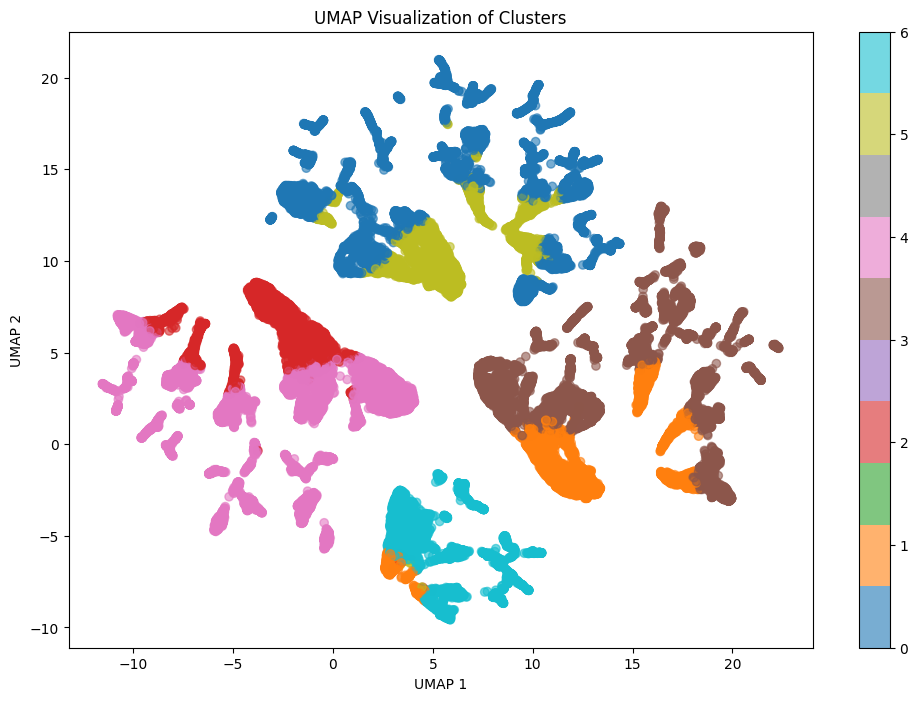


=== Clustering Analysis Report ===
Number of clusters: 7
Silhouette Score: 0.3494

Cluster Sizes:
Cluster 0: 6745 samples (21.25%)
Cluster 1: 3060 samples (9.64%)
Cluster 2: 2939 samples (9.26%)
Cluster 3: 6185 samples (19.49%)
Cluster 4: 6621 samples (20.86%)
Cluster 5: 2890 samples (9.11%)
Cluster 6: 3297 samples (10.39%)

Feature Statistics per Cluster:

Cluster 0 Characteristics:
Top distinguishing features:
- customer_region_3: 1.52 std higher than average
- mnt_Per_Order: 0.80 std higher than average
- customer_region_2: 0.66 std lower than average
- Total_Orders_Per_Client: 0.63 std lower than average
- customer_region_1: 0.62 std lower than average

Cluster 1 Characteristics:
Top distinguishing features:
- is_chain: 1.72 std higher than average
- Total_Orders_Per_Client: 1.62 std higher than average
- product_count: 1.61 std higher than average
- vendor_count: 1.60 std higher than average
- customer_region_1: 1.31 std higher than average

Cluster 2 Characteristics:
Top disting

In [11]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

def apply_pca(df, variance_threshold=0.80):
    # Remove any non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Apply PCA directly without scaling
    pca = PCA()
    pca_data = pca.fit_transform(numeric_df)

    # Calculate cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Find number of components needed for desired variance
    n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

    # Reduce to selected number of components
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(numeric_df)

    print(f"Number of components selected: {n_components}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

    return pca_data

def analyze_clusters(pca_data, df, n_clusters=7):
    # Initialize KMeans with the optimized parameters
    kmeans = KMeans(
        n_clusters=n_clusters,
        max_iter=4119,
        n_init=155,
        tol=7.631932953284075e-05,
        init='k-means++',
        random_state=42
    )

    # Fit KMeans
    clusters = kmeans.fit_predict(pca_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_data, clusters)

    # UMAP Dimensionality Reduction for Visualization
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(pca_data)

    # Create visualization
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                         c=clusters, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('UMAP Visualization of Clusters')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()

    # Cluster Analysis Report
    print("\n=== Clustering Analysis Report ===")
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")

    # Cluster sizes
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    print("\nCluster Sizes:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} samples ({size/len(clusters)*100:.2f}%)")

    # Feature analysis per cluster
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = clusters

    print("\nFeature Statistics per Cluster:")
    # Only use numeric columns for analysis
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    cluster_stats = df_with_clusters.groupby('Cluster')[numeric_cols].agg(['mean', 'std'])

    # Print feature statistics for each cluster
    for cluster in range(n_clusters):
        print(f"\nCluster {cluster} Characteristics:")

        # Find distinguishing features
        overall_means = df_with_clusters[numeric_cols].mean()
        cluster_means = df_with_clusters[df_with_clusters['Cluster'] == cluster][numeric_cols].mean()

        # Calculate z-scores of differences
        differences = (cluster_means - overall_means) / df_with_clusters[numeric_cols].std()

        # Print top distinguishing features
        print("Top distinguishing features:")
        top_features = differences.abs().sort_values(ascending=False).head(5)
        for feature in top_features.index:
            direction = "higher" if differences[feature] > 0 else "lower"
            print(f"- {feature}: {abs(differences[feature]):.2f} std {direction} than average")

    return clusters, embedding

# Now run the complete analysis
pca_data = apply_pca(df)
clusters, embedding = analyze_clusters(pca_data, df)

In [7]:
results, fig = run_clustering_comparison(df, n_clusters=4)
print(results)
plt.show()

NameError: name 'run_clustering_comparison' is not defined

In [ ]:
def optimize_kmeans_random(data, n_clusters=4, n_iter=20):
    param_distributions = {
        'max_iter': [300, 500, 700],
        'n_init': [10, 15, 20],
        'init': ['k-means++']
    }

    best_score = -1
    best_model = None
    best_params = None
    scores = []
    params = []

    for _ in range(n_iter):
        params_combo = {k: np.random.choice(v) for k,v in param_distributions.items()}
        model = KMeans(n_clusters=n_clusters, **params_combo, random_state=42)
        model.fit(data)
        score = silhouette_score(data, model.labels_)

        if score > best_score:
            best_score = score
            best_model = model
            best_params = params_combo

        scores.append(score)
        params.append(params_combo)

    print(f"Best silhouette score: {best_score}")
    return best_model, best_params, list(zip(params, scores))
# Usage
data = apply_pca(df)
best_model, best_params, results = optimize_kmeans_random(data)
print(f"\nBest parameters: {best_params}")
best_labels = best_model.predict(data)

Best silhouette score: 0.3118571769765192

Best parameters: {'max_iter': 500, 'n_init': 10, 'init': 'k-means++'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


1. Tune parameters on complete dataset first,

2. Apply optimized parameters to your split segments:

-Value-based features

-Behavioral features

-Demographic features


3. Merge segments using hierarchical clustering

4. Decision tree feature importance thing

5. Validate final segmentation with business metrics

<Figure size 1000x700 with 0 Axes>

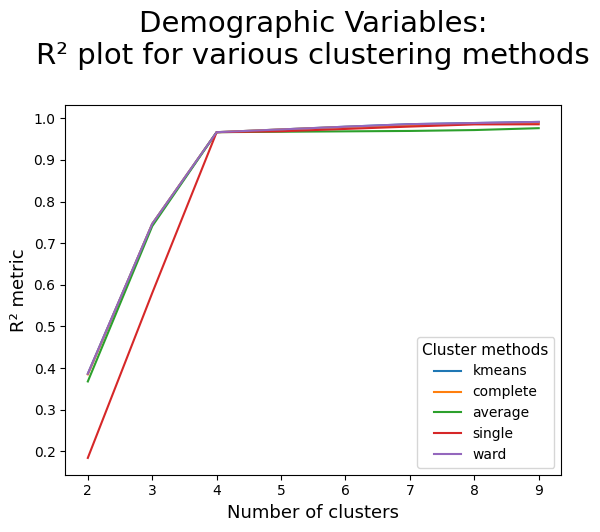

In [ ]:
datasets = {
    'Demographic': df_dem,
    'Values': df_val,
    'Preferences': df_pref,
    'Shopping': df_shop
}

for name, df in datasets.items():
    # Calculate R² scores
    r2_scores = {}
    r2_scores['kmeans'] = get_r2_scores(df, kmeans)

    for linkage in ['complete', 'average', 'single', 'ward']:
        r2_scores[linkage] = get_r2_scores(
            df,
            hierarchical.set_params(linkage=linkage)
        )

    plt.figure(figsize=(10, 7))
    pd.DataFrame(r2_scores).plot.line()
    plt.title(f"{name} Variables:\nR² plot for various clustering methods\n", fontsize=21)
    plt.legend(title="Cluster methods", title_fontsize=11)
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R² metric", fontsize=13)
    plt.show()

NameError: name 'clone' is not defined

In [ ]:
# Testing on K-means and Hierarchical clustering to decide amount of clusters